# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | novodvinsk
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | brokopondo
Processing Record 7 of Set 1 | veracruz
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | yaren
Processing Record 16 of Set 1 | kenai
Processing Record 17 of Set 1 | ishikawa
Processing Record 18 of Set 1 | lima
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | belmonte
Processing Record 22 of Set 1 | ust-nera
Processing Record 23 of Set 1 | edinburgh of t

Processing Record 39 of Set 4 | fortuna
Processing Record 40 of Set 4 | muang khong
Processing Record 41 of Set 4 | ilulissat
Processing Record 42 of Set 4 | palmer
Processing Record 43 of Set 4 | waingapu
Processing Record 44 of Set 4 | isafjordur
Processing Record 45 of Set 4 | onega
Processing Record 46 of Set 4 | thompson
Processing Record 47 of Set 4 | port augusta
Processing Record 48 of Set 4 | belinskiy
Processing Record 49 of Set 4 | al jawf
Processing Record 0 of Set 5 | vondrozo
Processing Record 1 of Set 5 | yanykurgan
Processing Record 2 of Set 5 | kalabo
Processing Record 3 of Set 5 | dadonghai
City not found. Skipping...
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | faya-largeau
Processing Record 6 of Set 5 | atafu village
Processing Record 7 of Set 5 | hailar
Processing Record 8 of Set 5 | donghai
Processing Record 9 of Set 5 | yeraliyev
Processing Record 10 of Set 5 | ilha de mocambique
Processing Record 11 of Set 5 | talnakh
Proces

City not found. Skipping...
Processing Record 34 of Set 8 | aykhal
Processing Record 35 of Set 8 | buala
Processing Record 36 of Set 8 | cestos city
Processing Record 37 of Set 8 | prievidza
Processing Record 38 of Set 8 | morehead
Processing Record 39 of Set 8 | island harbour
Processing Record 40 of Set 8 | kayangel
Processing Record 41 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 42 of Set 8 | rio preto da eva
Processing Record 43 of Set 8 | sakiai
Processing Record 44 of Set 8 | kharp
Processing Record 45 of Set 8 | casper
Processing Record 46 of Set 8 | arkhangel'sk
Processing Record 47 of Set 8 | mao
Processing Record 48 of Set 8 | pijijiapan
Processing Record 49 of Set 8 | siwa oasis
Processing Record 0 of Set 9 | port lincoln
Processing Record 1 of Set 9 | amga
Processing Record 2 of Set 9 | guerrero negro
Processing Record 3 of Set 9 | coahuayana de hidalgo
Processing Record 4 of Set 9 | al fujairah city
Processing Record 5 of Set 9 | san mariano
Process

Processing Record 22 of Set 12 | sokoni
Processing Record 23 of Set 12 | nova sintra
Processing Record 24 of Set 12 | karkira
Processing Record 25 of Set 12 | bengaluru
Processing Record 26 of Set 12 | tartu
Processing Record 27 of Set 12 | kirakira
Processing Record 28 of Set 12 | strezhevoy
Processing Record 29 of Set 12 | hammerfest
Processing Record 30 of Set 12 | gubkinskiy
Processing Record 31 of Set 12 | cam ranh
Processing Record 32 of Set 12 | celestun
Processing Record 33 of Set 12 | mount isa
Processing Record 34 of Set 12 | redencao
Processing Record 35 of Set 12 | envira
Processing Record 36 of Set 12 | oulad teima
Processing Record 37 of Set 12 | nkurenkuru
City not found. Skipping...
Processing Record 38 of Set 12 | correntina
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,8.73,87,100,7.72,US,1686441060
1,mar del plata,-38.0023,-57.5575,7.27,90,75,3.09,AR,1686441056
2,novodvinsk,64.4165,40.8122,2.07,90,60,1.96,RU,1686441056
3,grytviken,-54.2811,-36.5092,0.81,99,100,2.36,GS,1686441033
4,stanley,54.8680,-1.6985,12.06,91,0,0.00,GB,1686440860


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
#convert date to be more readable
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit ="s")
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,8.73,87,100,7.72,US,2023-06-10 23:51:00
1,mar del plata,-38.0023,-57.5575,7.27,90,75,3.09,AR,2023-06-10 23:50:56
2,novodvinsk,64.4165,40.8122,2.07,90,60,1.96,RU,2023-06-10 23:50:56
3,grytviken,-54.2811,-36.5092,0.81,99,100,2.36,GS,2023-06-10 23:50:33
4,stanley,54.8680,-1.6985,12.06,91,0,0.00,GB,2023-06-10 23:47:40
...,...,...,...,...,...,...,...,...,...
557,mount isa,-20.7333,139.5000,19.87,30,0,0.00,AU,2023-06-10 23:50:47
558,redencao,-4.2258,-38.7306,22.74,96,5,0.55,BR,2023-06-10 23:56:52
559,envira,-7.3000,-70.2167,22.82,98,36,0.85,BR,2023-06-10 23:56:53
560,oulad teima,30.3947,-9.2090,19.60,80,13,2.64,MA,2023-06-10 23:56:53


In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,8.73,87,100,7.72,US,1686441060
1,mar del plata,-38.0023,-57.5575,7.27,90,75,3.09,AR,1686441056
2,novodvinsk,64.4165,40.8122,2.07,90,60,1.96,RU,1686441056
3,grytviken,-54.2811,-36.5092,0.81,99,100,2.36,GS,1686441033
4,stanley,54.8680,-1.6985,12.06,91,0,0.00,GB,1686440860


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

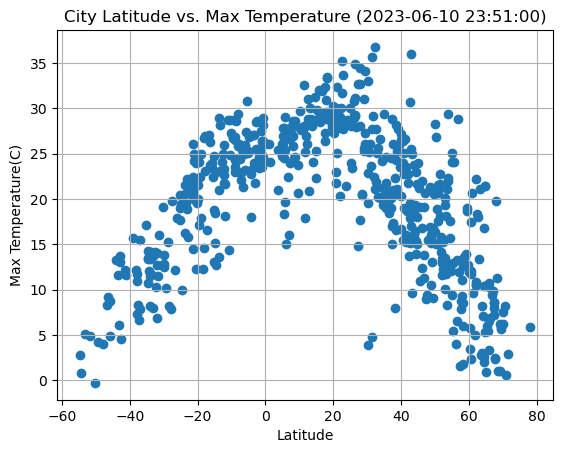

In [9]:
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit ="s")
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({city_data_df.iloc[0,8]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid("on")



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

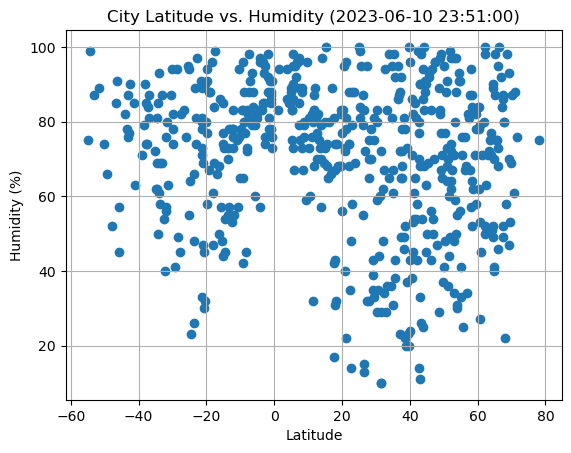

In [10]:
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit ="s")

# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({city_data_df.iloc[0,8]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid("on")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

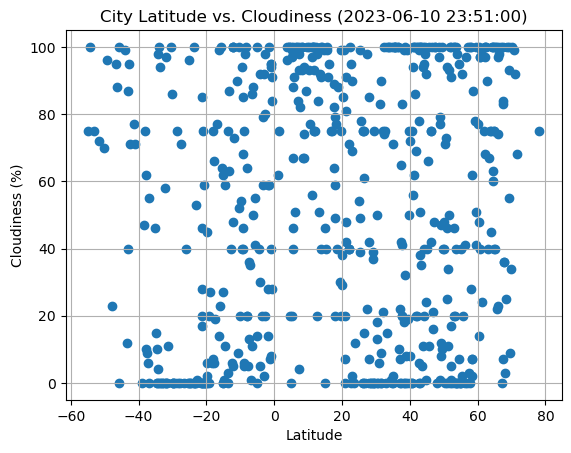

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({city_data_df.iloc[0,8]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid("on")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

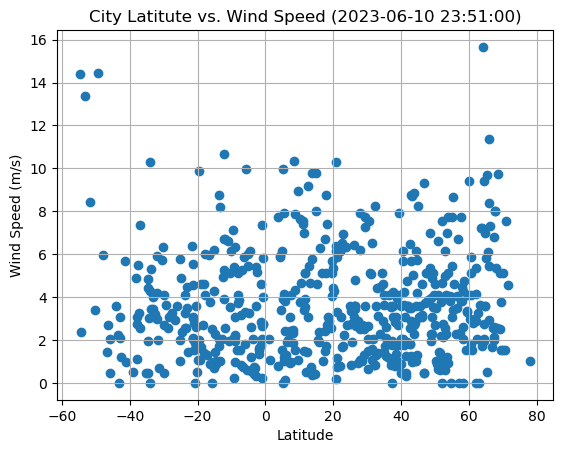

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title(f"City Latitute vs. Wind Speed ({city_data_df.iloc[0,8]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid("on")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
from scipy import stats




In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,8.73,87,100,7.72,US,2023-06-10 23:51:00
2,novodvinsk,64.4165,40.8122,2.07,90,60,1.96,RU,2023-06-10 23:50:56
4,stanley,54.8680,-1.6985,12.06,91,0,0.00,GB,2023-06-10 23:47:40
5,brokopondo,4.7500,-55.1667,25.56,85,20,3.42,SR,2023-06-10 23:55:49
6,veracruz,19.3333,-96.6667,29.27,68,30,2.54,MX,2023-06-10 23:51:33


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mar del plata,-38.0023,-57.5575,7.27,90,75,3.09,AR,2023-06-10 23:50:56
3,grytviken,-54.2811,-36.5092,0.81,99,100,2.36,GS,2023-06-10 23:50:33
8,port-aux-francais,-49.3500,70.2167,4.21,66,96,14.44,TF,2023-06-10 23:50:29
9,adamstown,-25.0660,-130.1015,20.47,55,96,5.78,PN,2023-06-10 23:50:33
13,hermanus,-34.4187,19.2345,12.02,85,4,3.03,ZA,2023-06-10 23:50:52


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.742796382673445


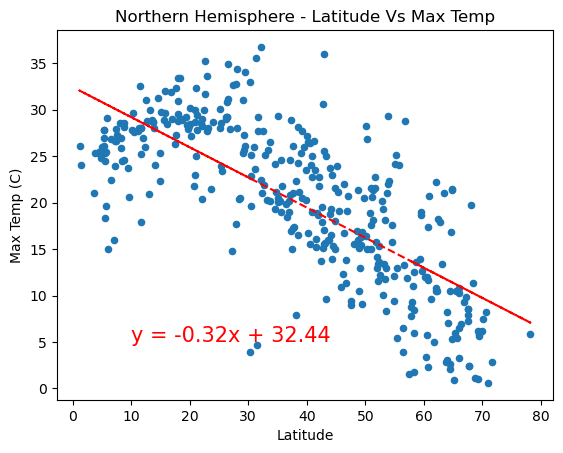

In [17]:
# Linear regression on Northern Hemisphere

slope, int, r, p, std_err = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
lin_reg = (slope * northern_hemi_df["Lat"]) + int


northern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Max Temp",
                     xlabel= "Latitude", ylabel= "Max Temp (C)",
                     title = "Northern Hemisphere - Latitude Vs Max Temp")
plt.plot(northern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,2)}x + {round(int,2)}"
plt.annotate(lin_eq,(10,5),fontsize=15, color = "red")



print(f"The r value is: {r}")
plt.show()


The r value is: 0.8642931677661506


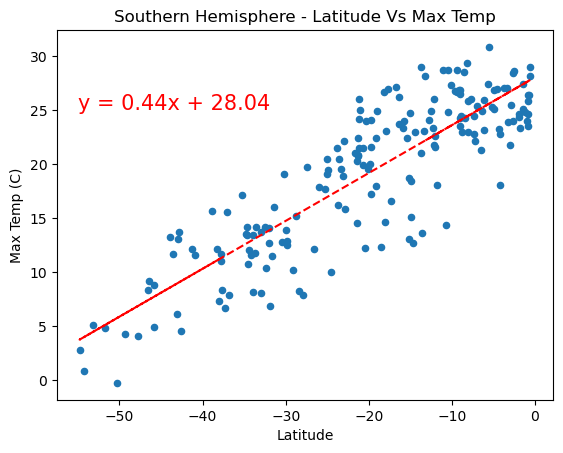

In [18]:
# Linear regression on Southern Hemisphere
slope, int, r, p, std_err = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
lin_reg = (slope * southern_hemi_df["Lat"]) + int

southern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Max Temp",
                     xlabel= "Latitude", ylabel= "Max Temp (C)",
                     title = "Southern Hemisphere - Latitude Vs Max Temp")
plt.plot(southern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,2)}x + {round(int,2)}"
plt.annotate(lin_eq,(-55,25),fontsize=15, color = "red")


print(f"The r value is: {r}")
plt.show()


**Discussion about the linear relationship:** 

-- The r value is greater than .5, therefore, the max temperature of a given city does correlate with the city's latitude

### Humidity vs. Latitude Linear Regression Plot

The r value is: -0.10951603394579909


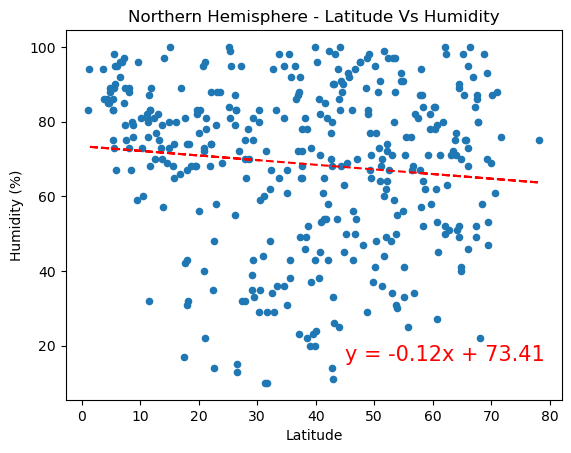

In [19]:
# Northern Hemisphere
slope, int, r, p, std_err = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
lin_reg = (slope * northern_hemi_df["Lat"]) + int

northern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Humidity",
                     xlabel= "Latitude", ylabel= "Humidity (%)",
                     title = "Northern Hemisphere - Latitude Vs Humidity")
plt.plot(northern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,2)}x + {round(int,2)}"
plt.annotate(lin_eq,(45,16),fontsize=15, color = "red")


print(f"The r value is: {r}")
plt.show()



The r value is: 0.13397959458135625


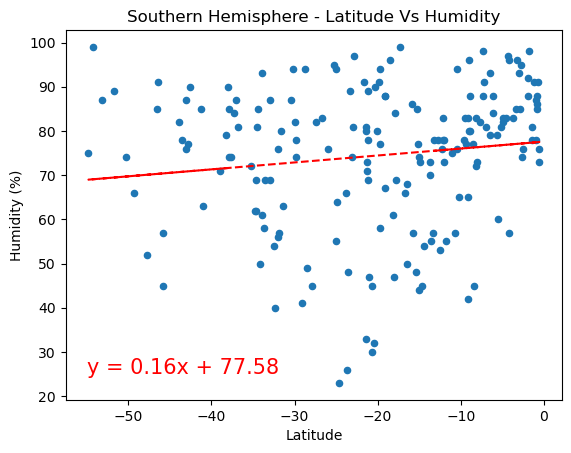

In [20]:
# Southern Hemisphere
slope, int, r, p, std_err = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
lin_reg = (slope * southern_hemi_df["Lat"]) + int

southern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Humidity",
                     xlabel= "Latitude", ylabel= "Humidity (%)",
                     title = "Southern Hemisphere - Latitude Vs Humidity")
plt.plot(southern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,2)}x + {round(int,2)}"
plt.annotate(lin_eq,(-55,25),fontsize=15, color = "red")


print(f"The r value is: {r}")
plt.show()


**Discussion about the linear relationship:**

- The r value is lower than .5. and therefore, it can be concluded that the humidity of a city does not correlate with the city's latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.1089379988248433


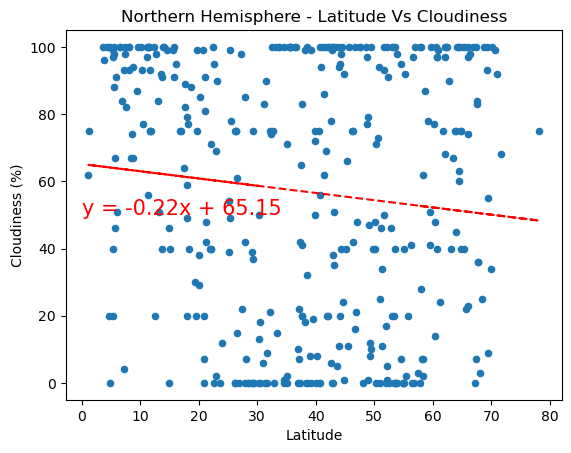

In [21]:
# Northern Hemisphere
slope, int, r, p, std_err = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
lin_reg = (slope * northern_hemi_df["Lat"]) + int

northern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Cloudiness",
                     xlabel= "Latitude", ylabel= "Cloudiness (%)",
                     title = "Northern Hemisphere - Latitude Vs Cloudiness")
plt.plot(northern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,2)}x + {round(int,2)}"
plt.annotate(lin_eq,(0,50),fontsize=15, color = "red")


print(f"The r value is: {r}")
plt.show()


The r value is: 0.022474215148243788


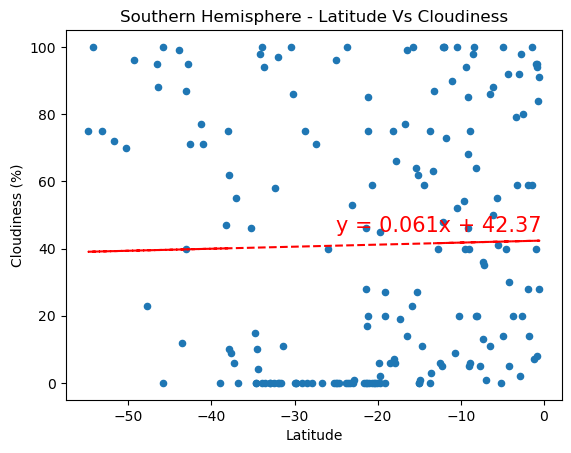

In [22]:
slope, int, r, p, std_err = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
lin_reg = (slope * southern_hemi_df["Lat"]) + int

southern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Cloudiness",
                     xlabel= "Latitude", ylabel= "Cloudiness (%)",
                     title = "Southern Hemisphere - Latitude Vs Cloudiness")
plt.plot(southern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,3)}x + {round(int,2)}"
plt.annotate(lin_eq,(-25,45),fontsize=15, color = "red")

print(f"The r value is: {r}")
plt.show()


**Discussion about the linear relationship:

- The r value is lower than .5, and therefore, it can be concluded that the cloudiness of a city does not correlate with the city's latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.03391019289011763


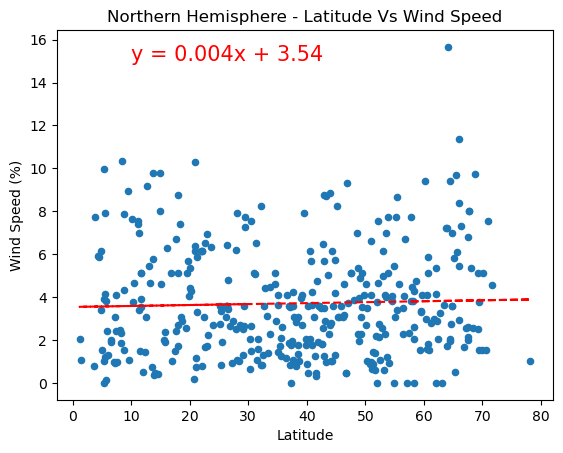

In [23]:
# Northern Hemisphere
slope, int, r, p, std_err = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
lin_reg = (slope * northern_hemi_df["Lat"]) + int

northern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Wind Speed",
                     xlabel= "Latitude", ylabel= "Wind Speed (%)",
                     title = "Northern Hemisphere - Latitude Vs Wind Speed")
plt.plot(northern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,3)}x + {round(int,2)}"
plt.annotate(lin_eq,(10,15),fontsize=15, color = "red")

print(f"The r value is: {r}")
plt.show()


The r value is: -0.14315246752797456


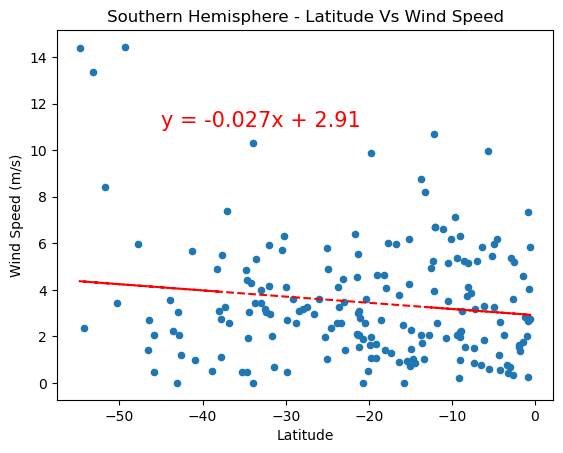

In [24]:
# Southern Hemisphere
slope, int, r, p, std_err = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
lin_reg = (slope * southern_hemi_df["Lat"]) + int

southern_hemi_df.plot(kind = "scatter", x= "Lat" , y= "Wind Speed",
                     xlabel= "Latitude", ylabel= "Wind Speed (m/s)",
                     title = "Southern Hemisphere - Latitude Vs Wind Speed")
plt.plot(southern_hemi_df["Lat"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,3)}x + {round(int,2)}"
plt.annotate(lin_eq,(-45,11),fontsize=15, color = "red")

print(f"The r value is: {r}")
plt.show()


**Discussion about the linear relationship:** 

- The r value is lower than .5, therefore, it can be concluded that the latitude of a city does not correlate with the city's wind speed.